<a href="https://colab.research.google.com/github/mariabandeira/AprendizagemDeMaquina/blob/main/Pratica_PLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="darkblue"> Prática 01: Perceptron Learning Algorithm (PLA) </font>




**Objetivos:**


*   Entender o funcionamento do PLA e dos componentes de aprendizagem.
*   Fixar o conceito de aprendizagem.



**Descrição:**

Crie uma dataset $D$ com 1000 pontos e uma função alvo $f$ para compreender o funcionamento do PLA. Para visualizar os passos do algoritmo, considere $d=2$ e assuma $X=[-1,1]\times[-1,1]$, em que $x\in X$ é escolhido com probabilidade uniforme. Escolha uma reta como função alvo, em que um lado da reta seja mapeado para $+1$ e o outro para $-1$. Gere então pontos aleatórios $x_i$ e obtenha sua classificação $y_i$ a partir da função alvo. Divida os dados em um grupo de treinamento e outro de teste.

Após a preparação dos dados, crie uma função $PLA()$ que inicia com os pesos todos iguais a zero e, a cada iteração, deixe o algoritmo escolher aleatoriamente um dos pontos com classificação incorreta até que ele convirja. Rode o PLA sobre amostras com $N=10$ e $N=100$, teste a hipótese solução a partir de pontos diferentes (conjunto de teste) daqueles das amostras e responda a seguinte questão:

- Qual o percentual de pontos classificados corretamente para cada hipótese solução?










# <font color="darkblue"> Solução </font>


###  Preparação dos dos dados

O objetivo da prepação dos dados é a criação da função alvo e do dataset conforme a descrição do problema. Para tanto, você deve realizar os seguintes passos:

* Crie a função alvo (uma reta) a partir de dois pontos gerados aleatoriamente;
* Calcule o coeficiente angular e o coeficiente linear (bias) e os armazene em variáveis distintas;
* Gere aleatoriamente 1000 pontos, cujas coordenadas estão no intervalo $[-1,1]$, e os adicione em uma lista $X$ correspondendo aos dados da amostra;
* Para cada ponto gerado, use a função sign() de numpy, que recebe como entrada uma reta (função alvo), para obter a classificação de cada ponto. Adicione cada classificação em uma lista $y$.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output


In [ ]:
p1 = [random.uniform(-1, 1), random.uniform(-1,1)]
p2 = [random.uniform(-1, 1), random.uniform(-1,1)]

m = (p2[1] - p1[1]) / (p2[0] - p1[0])
b = p1[1] - m *p1[0]

In [ ]:
p1

[-0.08840712136237894, 0.7052043161052239]

In [ ]:
p2

[0.6770475502069466, -0.8545016666720526]

In [ ]:
m

-2.0376203068688405

In [ ]:
b

0.5250641703454225

In [ ]:
X = []
for i in range(1000):
    x = [random.uniform(-1, 1), random.uniform(-1,1)]
    X.append(x)

In [ ]:
X[1][0]

0.801540145048995

In [ ]:
Y = []
for i in range(1000):
    y = np.sign(X[i][1] - m*X[i][0] - b)
    Y.append(y)

In [ ]:
Y[0]

1.0

### Visualizando o dataset
Use a função abaixo para visualizar o dataset criado anteriormente.

In [ ]:
def show_dataset(X, y, p1, p2, m, b):
    """
    Esta função tem o objetivo de exibir na tela uma amostra do dataset passado por parâmetro.

    Paramêtros:
    - X (matriz): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - p1 (list): Coordenadas do ponto p1 gerado para criar a função alvo.
    - p2 (list): Coordenadas do ponto p2 gerado para criar a função alvo.
    - m (float): Coeficiente angular da função alvo.
    - b (float): Coeficidnte linear da função alvo.
    """

    line = np.linspace(-1, 1, 1000)
    plt.plot(line, m*line + b, label="f(x)", c="green")

    # Pontos usados na criacao da reta
    plt.scatter(p1[0], p1[1], c='green')
    plt.scatter(p2[0], p2[1], c='green')

    for i in range(len(X[:200])):
        if (y[i] == 1):
            plt.scatter(X[i][0], X[i][1], c='blue')
        else:
            plt.scatter(X[i][0], X[i][1], c='red')

    plt.show()

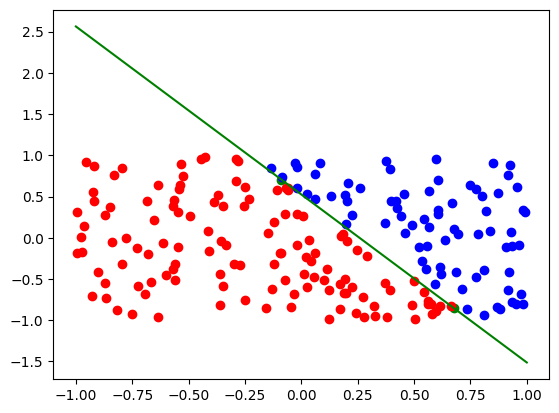

In [ ]:
show_dataset(X, Y, p1, p2, m, b)

### Algoritmo PLA
Complete a função PLA() abaixo para implementar o Algoritmo de Aprendizagem do Perceptron conforme os slides da aula de "Significado de aprendizagem".

In [ ]:
def PLA(X, y, f):
    """
    Esta função corresponde ao Algoritmo de Aprendizagem do modelo Perceptron.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.

    Retorno:
    - it (int): Quantidade de iterações necessárias para corrigir todos os pontos classificados incorretamente.
    - w (list): Lista de três elementos correspondendo aos pesos do perceptron.
    """
    w = [0,0,0]
    it = 0
    listaPCI = X
    new_y = y
    while (len(listaPCI) > 0):
        it = it + 1

        # escolha aleatoriamente um ponto xi pertencente à lista
        i = random.randint(0, len(X)-1)

        # atualiza o vetor de pesos ao corrigir a classificação de x
        w[1] += y[i]*X[i][0]
        w[2] += y[i]*X[i][1]
        w[0] = new_y[i]

        listaPCI, new_y = constroiListaPCI(X, y, w)

        # Após atualizar os pesos para correção do ponto escolhido, você irá chamar a função plotGrafico()
        plot_grafico(X, y, w, f)


    return it, w

### Função para visualização dos passos do PLA
A função abaixo é uma função auxiliar que permite que vocês enxerguem o resultado de cada iteração da função PLA().

In [ ]:
%matplotlib inline
def plot_grafico(X, y, w, f):
    """
    Esta função objetiva a visualização dos passos do PLA.

    Paramêtros:
    - X (list[]): Matriz 1000x2 correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.
    - f (list): Lista de dois elementos correspondendo, respectivamente, aos coeficientes angular e linear
    da função alvo.
    """

    nPontos = len(X)
    #matplotlib.use('TkAgg')

    ax = plt.gca()
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')

    plt.axis([-1, 1, -1, 1])

    x_plt = [X[i][0] for i in range(nPontos)]
    y_plt = [X[i][1] for i in range(nPontos)]

    for i in range(nPontos):
        if (y[i] == 1):
            plt.scatter(x_plt[i], y_plt[i], s=10, c='blue')
        else:
            plt.scatter(x_plt[i], y_plt[i], s=10, c='red')

    x = np.linspace(-1, 1, 1000)
    plt.plot(x, f[0]*x + f[1], c='green') # f[0] = m, f[1] = b
    plt.plot(x, (-w[0] - w[1]*x) / w[2], c='orange') # A*x + B*y + C => y = (-C - A*x) / B
    clear_output(wait=True)
    plt.show(block=False)
    plt.pause(0.01)


### Função para construir lista de pontos classificados incorretamente
Implemente a função abaixo para contruir a lista de pontos classificados incorretamente em cada iteração do loop principal da função PLA().


In [ ]:
def constroiListaPCI(X, y, w):
    """
    Esta função constrói a lista de pontos classificados incorretamente.

    Paramêtros:
    - X (list[]): Matriz correspondendo aos dados amostra. Cada elemento de X é uma lista que corresponde
    às coordenadas dos pontos gerados.
    - y (list): Classificação dos pontos da amostra X.
    - w (list): Lista correspondendo aos pesos do perceptron.

    Retorno:
    - l (list): Lista com os pontos classificador incorretamente.
    - new_y (list): Nova classificação de tais pontos.

    """
    new_y = []
    l = []
    for i in range(len(X)):
        new_y.append(np.sign(w[2]*X[i][1] + w[1]*X[i][0] + w[0]))

        if (new_y[i] != y[i]):
            l.append(X[i])
    return l, new_y

### Calculando a acurácia

Treine o Modelo de Aprendizagem de Máquina Perceptron com subamostras de tamanhos $N=10$ e $N = 100$, conforme o enunciado, e em seguida verifique a acurácia do modelo com uma subamostra de teste que contém pontos diferentes das subamostras utilizadas para treinamento.

In [ ]:
X10 = X[:10]

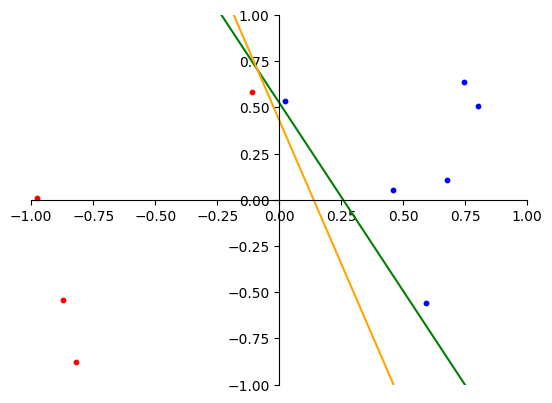

(12, [-1.0, 7.206734046461483, 2.3207078488547106])

In [ ]:
PLA(X10, Y, [m, b])

In [ ]:
X100 = X[:100]

In [ ]:
PLA(X100, Y, [m, b])

KeyboardInterrupt: 